In [42]:
import sklearn
import numpy as np 
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings #import warnings
warnings.filterwarnings('ignore')


In [11]:
data=pd.read_csv('doc.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [29]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [31]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

<Axes: >

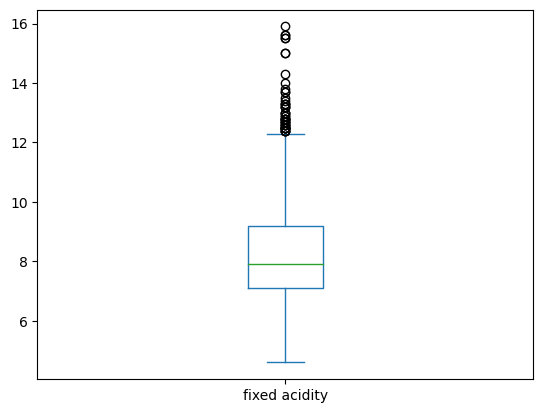

In [34]:
data['fixed acidity'].plot.box()

fixed acidity              Axes(0.125,0.53;0.0945122x0.35)
volatile acidity        Axes(0.238415,0.53;0.0945122x0.35)
citric acid             Axes(0.351829,0.53;0.0945122x0.35)
residual sugar          Axes(0.465244,0.53;0.0945122x0.35)
chlorides               Axes(0.578659,0.53;0.0945122x0.35)
free sulfur dioxide     Axes(0.692073,0.53;0.0945122x0.35)
total sulfur dioxide    Axes(0.805488,0.53;0.0945122x0.35)
density                    Axes(0.125,0.11;0.0945122x0.35)
pH                      Axes(0.238415,0.11;0.0945122x0.35)
sulphates               Axes(0.351829,0.11;0.0945122x0.35)
alcohol                 Axes(0.465244,0.11;0.0945122x0.35)
quality                 Axes(0.578659,0.11;0.0945122x0.35)
dtype: object

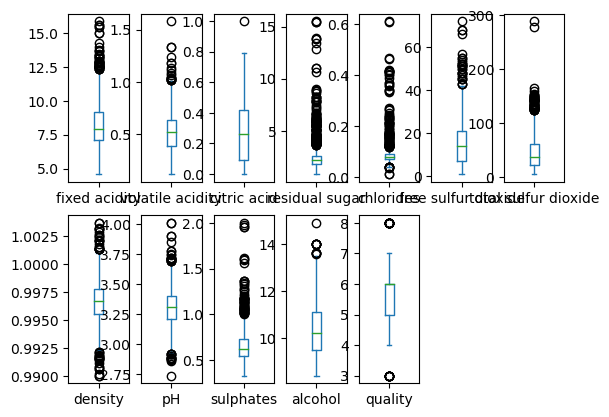

In [35]:
data.plot(kind='box',subplots=True,layout=(2,7))

In [37]:
z=np.abs(zscore(data))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [38]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

<Axes: ylabel='Frequency'>

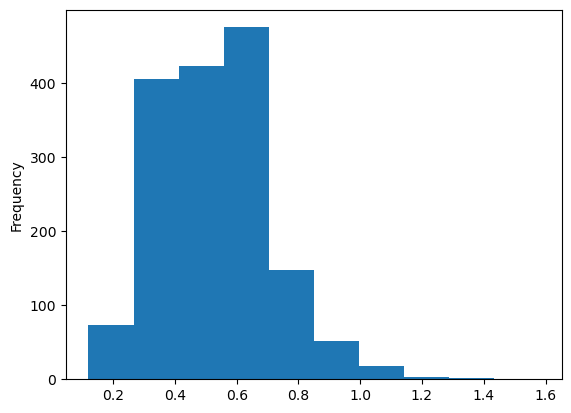

In [40]:
data['volatile acidity'].plot.hist()

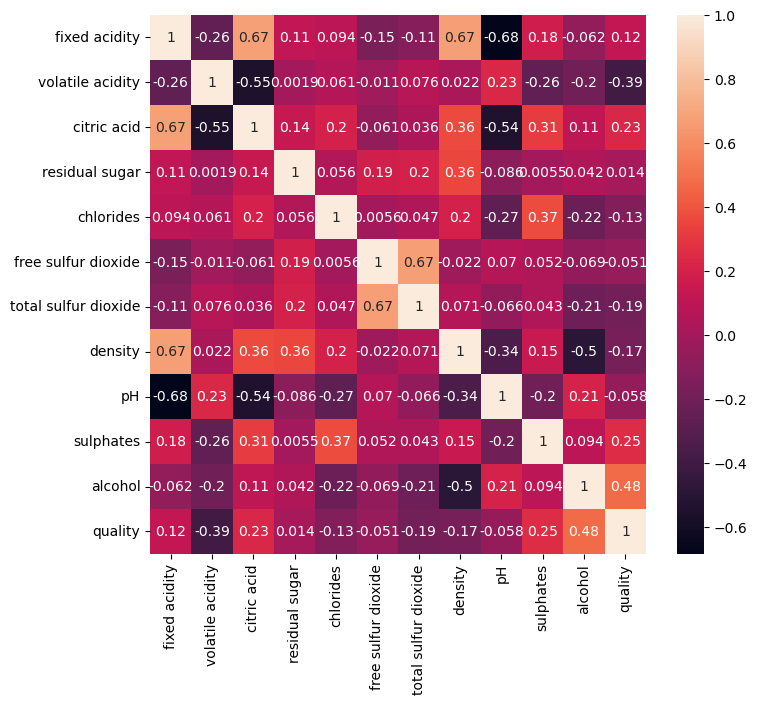

In [41]:
corr_hmap=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [13]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [16]:
x=data.iloc[:,0:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
y=data.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [19]:
x_train.shape

(1119, 11)

In [20]:
x_test.shape

(480, 11)

In [21]:
y_train.shape

(1119,)

In [22]:
y_test.shape

(480,)

In [23]:
dtc=DecisionTreeClassifier()

In [24]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
predit=dtc.predict(x_test)
predit

array([5, 4, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 7, 6, 5, 7, 5, 5, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5,
       5, 5, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6,
       6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 7, 5, 6, 7, 7, 5, 6,
       8, 5, 7, 4, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 7, 8, 5, 7, 5,
       6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 5, 6, 7, 5, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 7, 7, 6, 6, 4, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 6, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6, 5, 5, 5, 7, 5, 7, 6,
       6, 5, 5, 6, 4, 6, 6, 6, 5, 7, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 6,
       5, 7, 5, 6, 5, 5, 7, 6, 5, 4, 6, 7, 8, 5, 5, 7, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 4, 7, 6, 5, 7, 5, 7, 6, 5, 5, 6,
       6, 7, 5, 7, 5, 5, 7, 5, 6, 5, 6, 5, 6, 5, 5, 4, 6, 6, 7, 6, 5, 7,
       5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 3, 6, 5, 7, 7, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 5, 6, 5, 7, 8, 6, 5, 6, 5, 7, 7, 6, 5,

In [26]:
accuracy_score(y_test,predit)

0.5666666666666667

In [27]:
confusion_matrix(y_test,predit)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   1,  10,   5,   1,   0],
       [  2,   5, 125,  59,   4,   0],
       [  1,   3,  53, 118,  23,   2],
       [  0,   1,   5,  25,  27,   3],
       [  0,   0,   0,   3,   2,   1]], dtype=int64)

In [28]:
print(classification_report(y_test,predit))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.10      0.06      0.07        17
           5       0.64      0.64      0.64       195
           6       0.56      0.59      0.58       200
           7       0.47      0.44      0.46        61
           8       0.17      0.17      0.17         6

    accuracy                           0.57       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.56      0.57      0.56       480



In [43]:
score=cross_val_score(dtc,x,y,cv=5) 
print(score)
print(score.mean())
print(score.std())

[0.4875     0.44375    0.484375   0.49375    0.49216301]
0.48030760188087773
0.018579458163173936
